# Defining Helper Functions

In [1]:
#Function to set up a canvas for matplotlib subplots
def start_canvas(scheme=(1,1),size=(20,20),pad=5,**sp_kw):

  #Creating Canvas
  canv,axs = plt.subplots(nrows=scheme[0], ncols=scheme[1], **sp_kw)
  plt.style.use('fivethirtyeight')
  canv.set_size_inches(size)
  canv.tight_layout(pad=pad)
  #Getting a simple list of all the axis from the nested array
  lst_axs = axs.reshape(1,-1)[0]

  return canv, axs, lst_axs

#Function to Calculate IQR(Inter-Quartile Range) and respective limits
def Cal_IQR(col,data, upper=0.75, lower=0.25, factor=1.5):

  q1 = data[col].quantile(lower) #Q1
  q3 = data[col].quantile(upper) #Q3
  iqr = q3 - q1 #IQR
  up_lm = q3 + (factor * iqr) #Upper Limit
  low_lm = q1 - (factor * iqr) #Lower Limit
  val_up = data[data[col] > up_lm] #Finding rows with data above Upper Limit
  val_low = data[data[col] < low_lm] #Finding rows with data lower than Lower Limit
  
  return up_lm, low_lm, val_low, val_up

#Function to Delete the rows form the dataset which contains outliers(if any)
def Del_Outliers(col,data,**kw):

  up_lm, low_lm, val_low, val_up = Cal_IQR(col,data,**kw)#Calling Function to calculate limits
  
  if len(val_up) > 0:
    print('Deleting Rows with {} above than Upper Limit of {}\n'.format(col,up_lm))
    print('The Rows to be deleted are:\n')
    display(val_up)
    data.drop(index=val_up.index,inplace=True)
    print('\n******Deledted******\n')
  else:
    print('No Row with {} above the Upper Limit of {}\n'.format(col,up_lm))

  if len(val_low) > 0:
    print('Deleting Rows with {} less than Lower Limit of {}\n'.format(col,low_lm))
    print('The Rows to be deleted are:\n')
    display(val_low)
    data.drop(index=val_low.index,inplace=True)
    print('\n****Deledted****\n')
  else:
    print('No Row with {} lower than Lower Limit of {}\n'.format(col,low_lm))
  return

# Data Cleaning:
  ### 1. Look for Missing data
  ### 2. Look for Outliers
  ### 3. Look for Skewness

## 1. Missing Data

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('Data/Churn_Modelling_Original.csv')

#Dropping Useless Columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

### Calculating missing data ratio for all the celss

In [3]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)

pd.DataFrame({'Missing Ratio' :df_na})#Creating dataframe for the missing ratios

,Missing Ratio


### Note: Since the Dataframe of the missing ratio is empty, the data we are using has 0 'Null' values or no missing value, which is both rare and excellent. Because now we do not need to spend time dealing with a missing data problem.

--- ---- ---- --- ----- ----- ------- -------- --- ---- --- ---

## 2. Outliers
### Checking for outliers in numerical data

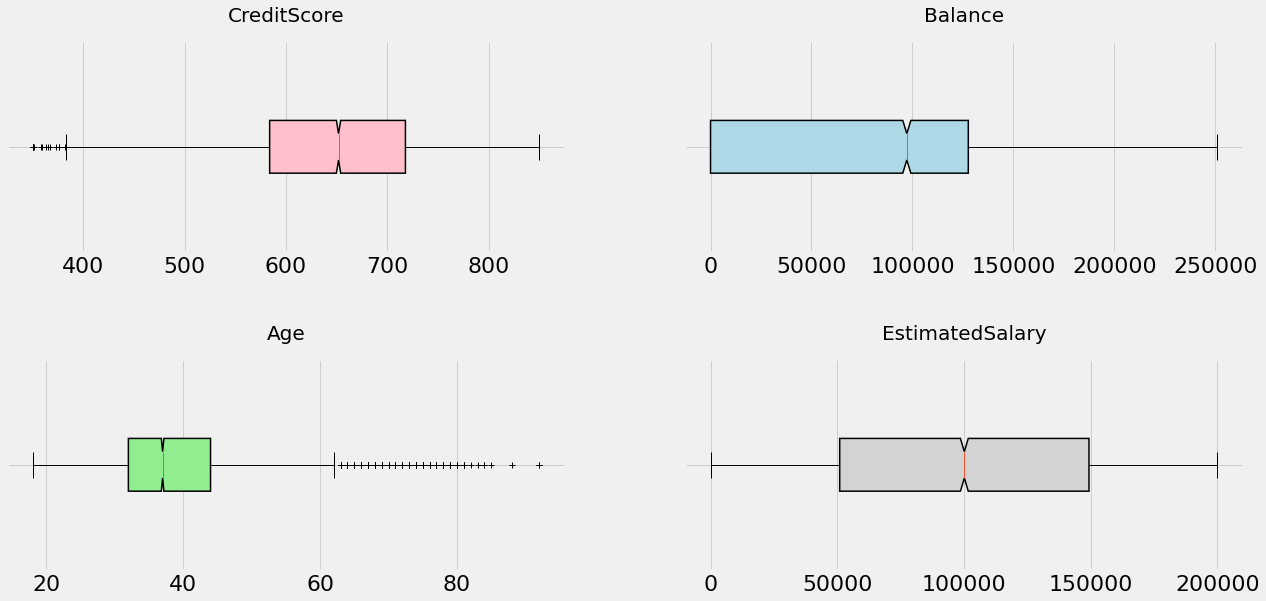

In [5]:
#Create Canvas
canv , _ , lst_axs = start_canvas((2,2),(20,10),6)

#List of Numerical Features and Colors
colors = ['pink', 'lightblue', 'lightgreen','lightgrey']
num_cols = ['CreditScore','Balance','Age','EstimatedSalary']

#Plotting Box Plot
for col,ax,color in zip(num_cols, lst_axs, colors):
  plt.sca(ax)
  bp = plt.boxplot(df[col],vert=False,patch_artist=True,notch=True,widths=0.25,sym='+',boxprops={'linewidth':1.5})
  bp['boxes'][0].set_facecolor(color)
  plt.tick_params(labelsize=22, labelleft=0)
  plt.title(col,fontdict={'fontsize':20},pad=20)
  plt.grid(axis='x',alpha=0.95)
plt.savefig('Visualizations/Box_Plots.png',bbox_inches='tight');

### Outlier Detection

Now, from the box plots we can see that out of the numerical features available the feature "Age" and "CreditScore" might have outliers that can hinder the training process.

So, we will only consider these two features while treating for outliers.

Also, we have a various methods to find the outliers. In this project we will use the IQR method but other options are:

        1. Z-score method
        2. Robust Z-score
        4. Winterization method(Percentile Capping)
        5. DBSCAN Clustering
        6. Isolation Forest

IQR stands for "Inter Quartiles Range"

For Calculating the IQR, the Standard way is to use Q1 = 0.25 and Q3 = 0.75. But since we don't have a large dataset lets assume a lower value for Q1 = 0.15 and higher value of Q3 = 0.90 so that we can conserve data points.

In [6]:
#Finding Limits for 'Age' 'CreditScore' Using previously defined function
for col in ['Age','CreditScore']:
  up_lm, low_lm,_,_ = Cal_IQR(col, data=df, upper=0.90, lower=0.15)
  print('For the Coloumn {}:\n'.format(col))
  print('The Upper Limit is: {:.2f}\nThe Lower Limit is: {:.2f}\n'.format(up_lm,low_lm))

For the Coloumn Age:

The Upper Limit is: 89.00
The Lower Limit is: -7.00

For the Coloumn CreditScore:

The Upper Limit is: 1127.50
The Lower Limit is: 195.50



In [7]:
#Deleting Outliers from 'Age' based on the limits calculated
Del_Outliers('Age', data=df, upper=0.90, lower=0.15)

Deleting Rows with Age above than Upper Limit of 89.0

The Rows to be deleted are:



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0



******Deledted******

No Row with Age lower than Lower Limit of -7.0



In [8]:
#Deleting Outliers from 'Age' based on the limits calculated
Del_Outliers('CreditScore', data=df, upper=0.90, lower=0.15)

No Row with CreditScore above the Upper Limit of 1127.5

No Row with CreditScore lower than Lower Limit of 195.5



### Note: We have deleted two instances or rows from for being potential outliers in 'Age' Feature Space originally the shape of the data was (10000, 11) now, the expected shape will be (9998,11)

--------------------------------------------------------

## 3. Skewness

#### Plotting Skewness index

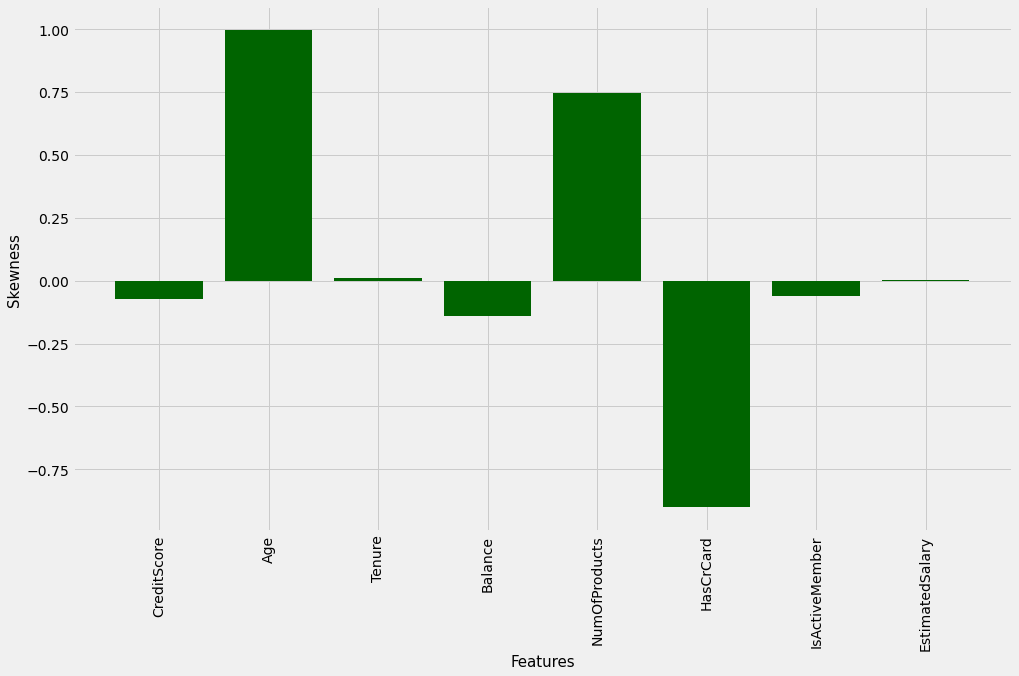

In [9]:
from scipy import stats

#Calculating Skewness index for all numerical features
skewness_list = {}
for i in df.drop('Exited',axis=1):
    if df[i].dtype != "object":
        skewness_list[i] = stats.skew(df[i])

#Plotting the Skewness data
skewness = pd.DataFrame({'Skew' :skewness_list})
plt.figure(figsize=(15,9))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.bar(range(len(skewness_list)), list(skewness_list.values()), align='center',color='darkgreen')
plt.xticks(range(len(skewness_list)), list(skewness_list.keys()), rotation='90')
plt.savefig('Visualizations/Skewness_Plot.png',bbox_inches='tight');

#### Plotting QQ Plots for deviation from normal distribution

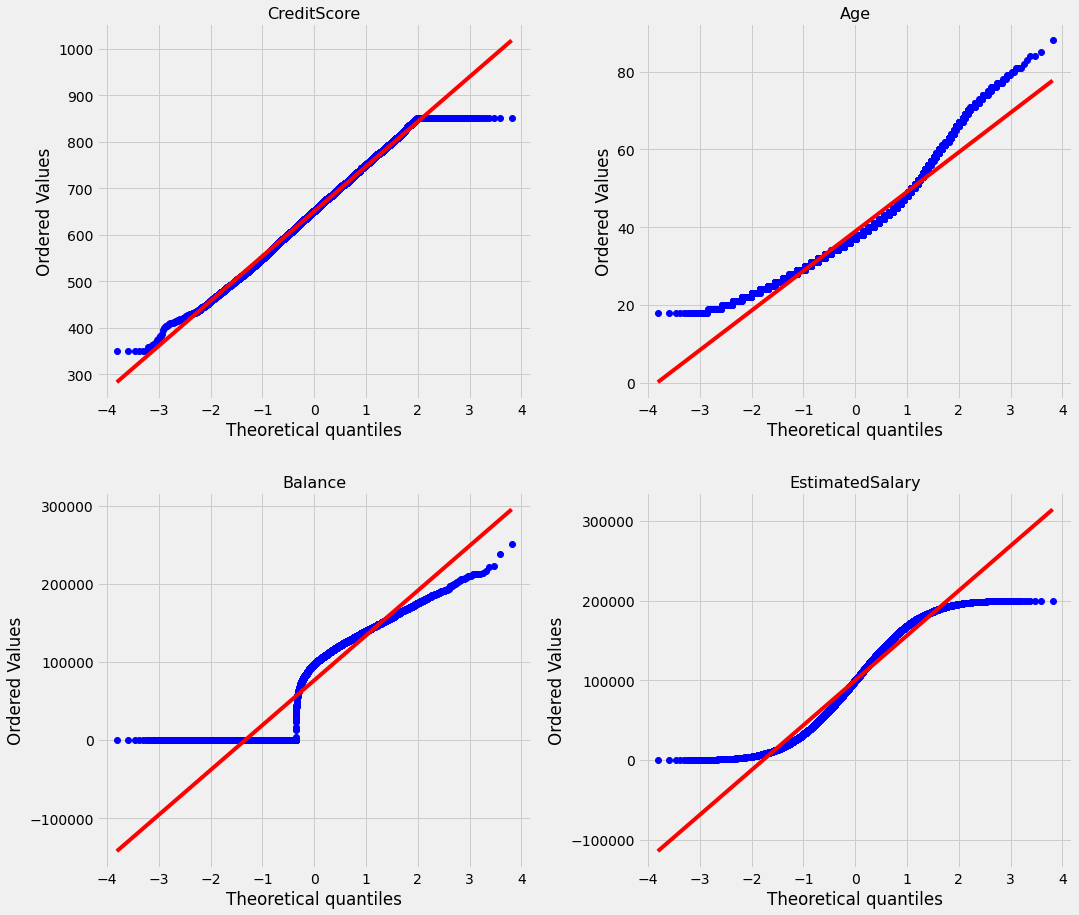

In [10]:
#Create Canvas
canv , _ , lst_axs = start_canvas((2,2),(16,14),5)

#Plotting QQ Plot
cont_col = ['CreditScore','Age','Balance','EstimatedSalary']
for col, ax in zip(cont_col,lst_axs):
  plt.sca(ax)
  stats.probplot(df[col], plot=ax)
  plt.title(col,size =16, pad = 5)
plt.savefig('Visualizations/QQ_Plots.png',bbox_inches='tight');

### Note: There are only two continuous numerical features in the data namely 'EstimatedSalary' and 'Balance' both of which are skewed. And since we have to scale our data to fit an ANN we can always use a StandardScalar that will not only scale the data but also normalize it.


--------------------------------------------------

# Exploratory Data Analysis (EDA)

## Histogram for Categorical Variables

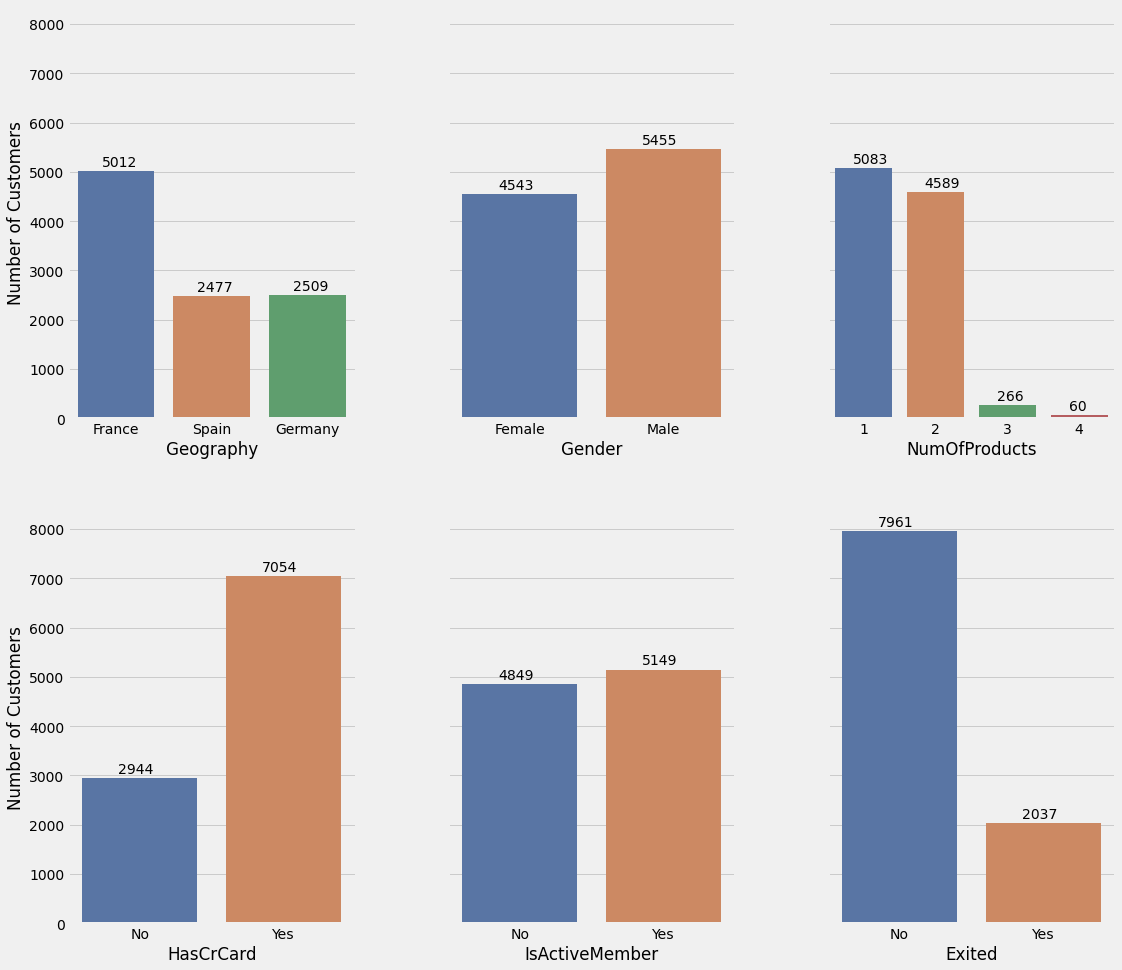

In [11]:
#Creating Canvas
canv, _, lst_axs = start_canvas((2,3),(17,15),5,sharey=True)

#Creating Histograms
cat_col = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
for col, ax in zip(cat_col, lst_axs):
  sns.countplot(x=col,data=df,ax=ax,palette='deep')
  for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height()+100))
  ax.set_ylabel('')

#Labeling Y-Axis:
for i in [0,3]:
  plt.sca(lst_axs[i])
  plt.ylabel('Number of Customers')

#Mapping Labels to X-axis
for i in [3,4,5]:
  plt.sca(lst_axs[i])
  plt.gca().set_xticks([0,1])
  plt.gca().set_xticklabels(['No','Yes'])
plt.savefig('Visualizations/Histograms.png',bbox_inches='tight');

## Histogram for Pivot Data of Categorical variables on the Target Variable

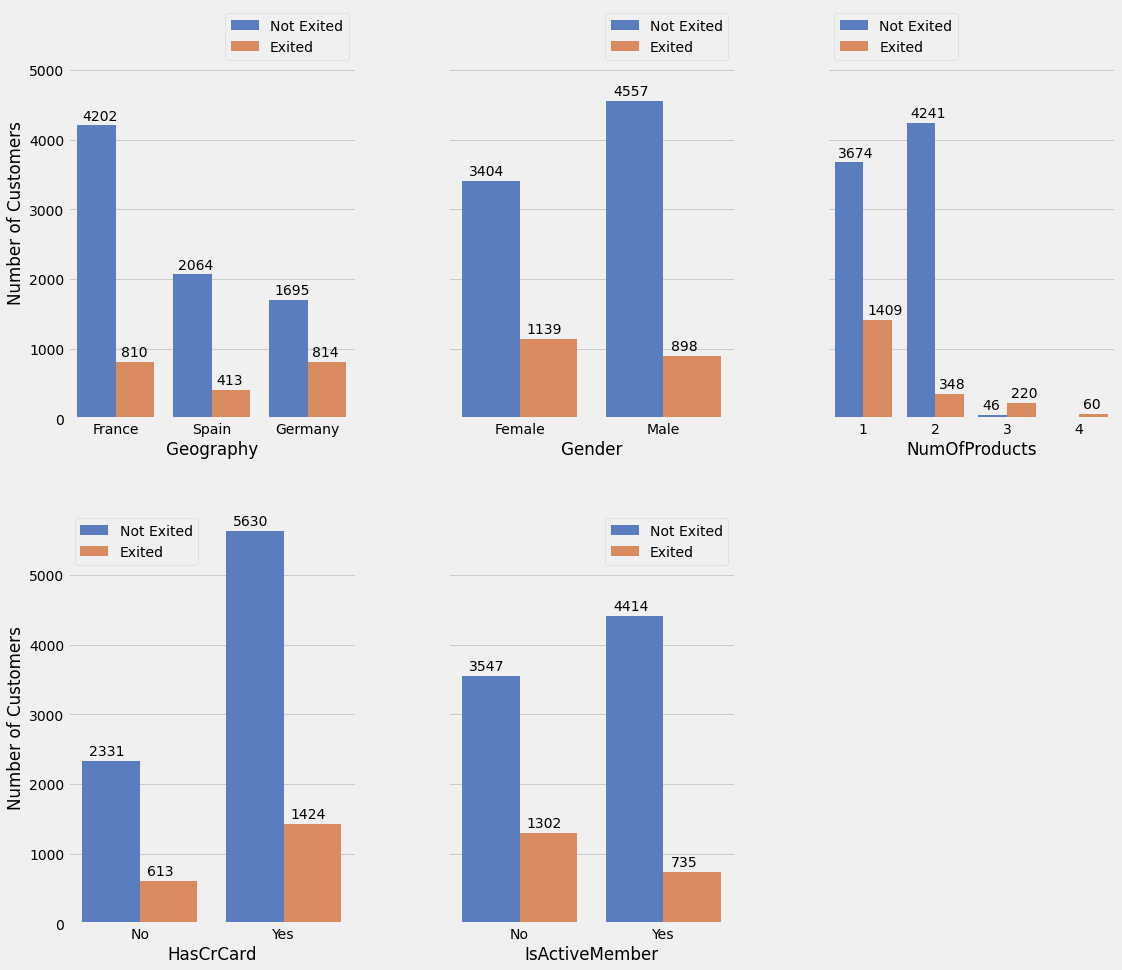

In [14]:
#Creating Canvas
canv, _, lst_axs = start_canvas((2,3),(17,15),5,sharey=True)
canv.delaxes(lst_axs[-1])

#Creating Histograms
for col, ax in zip(cat_col[0:-1], lst_axs[0:-1]):
  sns.countplot(x=col, data=df, hue='Exited', ax=ax, palette='muted')
  for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+80))
  ax.set_ylabel('')
  ax.legend(loc=0,labels=['Not Exited','Exited'])

#Labeling Y-Axis:
for i in [0,3]:
  plt.sca(lst_axs[i])
  plt.ylabel('Number of Customers')

#Mapping Labels to X-axis
for i in [3,4]:
  plt.sca(lst_axs[i])
  plt.gca().set_xticks([0,1])
  plt.gca().set_xticklabels(['No','Yes'])
plt.savefig('Visualizations/Histogram_againts_Exited.png',bbox_inches='tight');

## Creating Correlation matrix

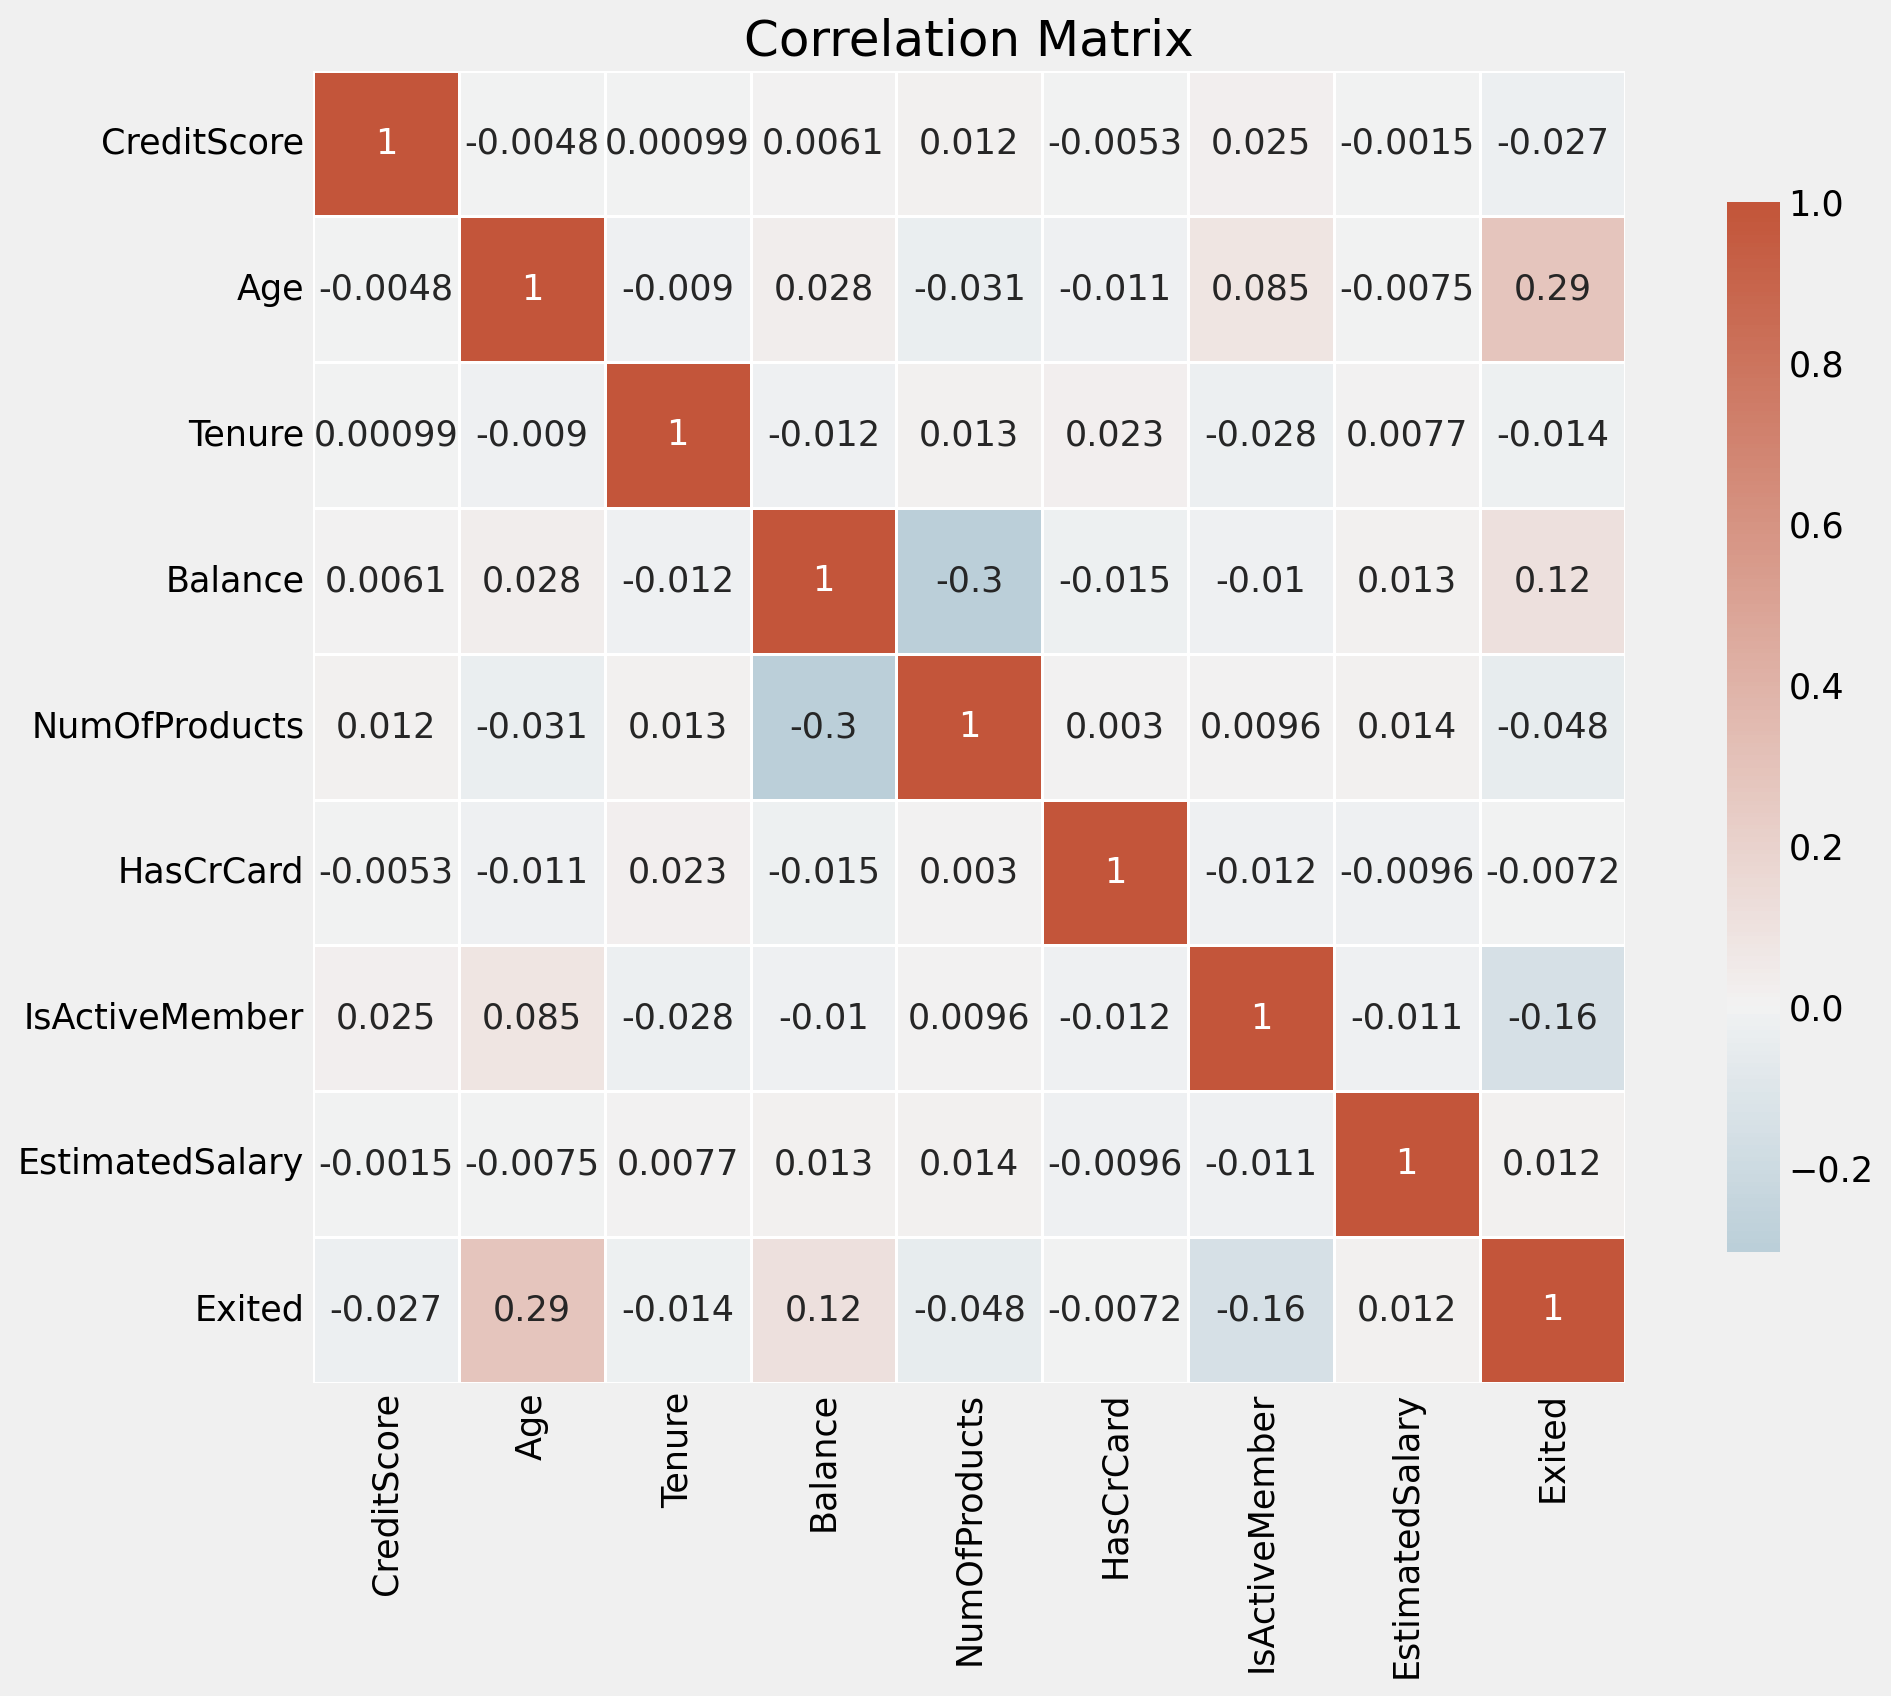

In [20]:
#Calculating Correlation:
cor = df.corr()

#Creating Visualization
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(13,9),dpi=180)
sns.heatmap(data=cor,cmap=cmap,square=True, linewidths=0.5,cbar_kws={"shrink": .8},annot=True,center=0)
plt.title('Correlation Matrix',size=20)
plt.savefig('Visualizations/Correlation_Matrix.png',bbox_inches='tight');

### Note: Looking at the Correlation Coefficient Heatmap we can asses that the features in the data does not correlate much with the target variable 'Exited and hence a traditional Machine learning algorithm might not be the optimal choice and Therefore, an ANN model is the goto choice for this project to modell the churn phenomenon
---------------------------------------------------------

# Things we need to do in the next phase:

## Feature Engineering
### 1. Encoding Categorical variabel
### 2. Scaling using StandardScalar to cure skewness
## Model Building
### 1. Define ANN Architecture
### 2. GridSearch HyperParameter Tuning
### 3. Run Cross Validation
## Validation on Test Set